In [107]:
import nltk
import pandas as pd
import csv
from pprint import pprint
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aashnakanuga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aashnakanuga/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [108]:
articles=pd.read_csv("./Data/Test_URL.csv",delimiter="|")
articles

,Unnamed: 0,url,text
0,0,http://www.foxnews.com/opinion/2018/06/12/trum...,"This material may not be published, broadcast,..."
1,1,http://www.foxnews.com/politics/2018/06/12/nor...,"This material may not be published, broadcast,..."
2,2,https://www.cnbc.com/2018/06/12/small-business...,Small business optimism rose in May to its hig...
3,3,http://thehill.com/opinion/finance/393007-free...,There has been a lot of discussion around glob...
4,4,https://www.dailysignal.com/2018/06/19/trump-a...,PoliticsAnalysis EconomyCommentary EconomyCom...
5,5,http://dailycaller.com/2018/06/19/obama-prosec...,The Obama administration prosecuted approximat...
6,6,http://www.investors.com/politics/commentary/c...,\n Access to this page has been...
7,7,http://www.dispatch.com/opinion/20170825/thoma...,As Washington continues to reel from the fai...
8,8,http://www.investors.com/politics/commentary/b...,\n Access to this page has been...
9,9,http://www.dispatch.com/opinion/20170927/andre...,Would you expect a 1986 automobile to be pra...


In [109]:
wordnet = WordNetLemmatizer()
i=0
stopWords = set(stopwords.words('english'))
with open('./Data/clean.csv', 'w',encoding="utf-8") as writer:
    with open('./Data/west_wing_reads.csv','rb') as data:
        spamwriter = csv.writer(writer, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        articles= pd.read_csv(data)
        for i in range(1335):
            if i==1334:
                word = word_tokenize(str(articles.extracted_keywords[i]))
                word=[words.lower() for words in word if words.isalpha()]
                wordsFiltered = []
                for w in word:
                    if w not in stopWords:
                        w = wordnet.lemmatize(w)
                        wordsFiltered.append(w)
                spamwriter.writerow(wordsFiltered)  
                break
            if(articles.extracted_keywords[i]==articles.extracted_keywords[i+1]):
                continue
            word = word_tokenize(str(articles.extracted_keywords[i]))
            word=[words.lower() for words in word if words.isalpha()]
            wordsFiltered = []
            for w in word:
                if w not in stopWords:
                    w = wordnet.lemmatize(w)
                    wordsFiltered.append(w)
            spamwriter.writerow(wordsFiltered)
            i=i+1
        
print("complete")
    
        

complete


In [110]:
df = pd.read_csv('./Data/clean.csv')
df.shape
    

(1243, 1)

In [111]:
with open('./Data/clean.csv') as dataset:
    articles = pd.read_csv(dataset)
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(articles)




In [112]:
wordnet = WordNetLemmatizer()
i=0
stopWords = set(stopwords.words('english'))
with open('./Data/clean_freq_group.csv', 'w',encoding="utf-8") as writer:
    with open('./Data/month_grouped.csv','rb') as data:
        spamwriter = csv.writer(writer, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        articles= pd.read_csv(data)
        for i in range(16):
            word = word_tokenize(str(articles.title[i]))
            word=[words.lower() for words in word if words.isalpha()]
            wordsFiltered = []
            for w in word:
                if w not in stopWords:
                    w = wordnet.lemmatize(w)
                    wordsFiltered.append(w)
            spamwriter.writerow(wordsFiltered)
            i=i+1
        
print("complete")

complete


In [113]:
df2=pd.read_csv('./Data/clean_freq_group.csv', header=None)

In [114]:
a = df2[0][10].split(' ')

In [115]:
b=dict(Counter(a))
d=dict(Counter(a).most_common(8))
print(d)

{'trump': 17, 'economic': 7, 'tax': 7, 'new': 6, 'plan': 6, 'reform': 5, 'opioid': 4, 'mike': 4}


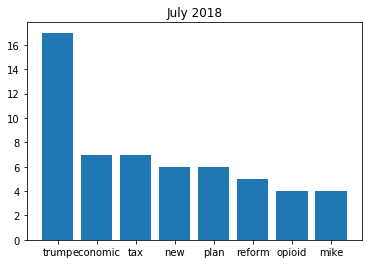

In [116]:
plt.bar(range(len(d)), d.values(), align="center")
plt.xticks(range(len(d)), list(d.keys()))
plt.title('July 2018')
plt.show()

In [117]:
wordnet = WordNetLemmatizer()
i=0
stopWords = set(stopwords.words('english'))
with open('./Data/trend_freq_group.csv', 'w',encoding="utf-8") as writer:
    with open('./Data/trends_grouped.csv','rb') as data:
        spamwriter = csv.writer(writer, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        articles= pd.read_csv(data)
        for i in range(12):
            word = word_tokenize(str(articles.trend[i]))
            word=[words.lower() for words in word if words.isalpha()]
            wordsFiltered = []
            for w in word:
                if w not in stopWords:
                    w = wordnet.lemmatize(w)
                    wordsFiltered.append(w)
            spamwriter.writerow(wordsFiltered)
            i=i+1
        
print("complete")

complete


In [118]:
df2=pd.read_csv('./Data/trend_freq_group.csv', header=None)
a=df2[0][2].split(' ')
pos=nltk.pos_tag(a)
a=[s for s in pos if s[1] != ('NN')]
l=dict(Counter(a).most_common(10))
l


{('williams', 'NNS'): 5,
 ('thursdaythoughts', 'NNS'): 4,
 ('west', 'JJS'): 4,
 ('jones', 'NNS'): 4,
 ('james', 'NNS'): 4,
 ('sean', 'JJ'): 4,
 ('gary', 'JJ'): 4,
 ('young', 'JJ'): 4,
 ('tom', 'JJ'): 3,
 ('newmusicfriday', 'JJ'): 3}